In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D

In [4]:
a = 1/2
N = 8
E_0 = 1/2

In [5]:
x_exact = np.linspace(-2.0, 2.0, 100)
x_pimc = np.linspace(-2.0, 2.0, 20)

# Harmonic oscillator

In [4]:
def V_harmonic_oscillator(x: float):
    return x**2 / 2

def psi_ground(x: float):
    return np.exp(-x**2 / 2) / np.pi**(1/4)

In [5]:
harmonic_oscillator = NonRelativisticSingleParticle1D(V=V_harmonic_oscillator, T=N*a, N=N)

In [6]:
propagators_exact = harmonic_oscillator.compute_propagator_from_ground_state(x_exact, ground_energy=E_0, ground_wavefunction=psi_ground)
propagators_pimc_results = harmonic_oscillator.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

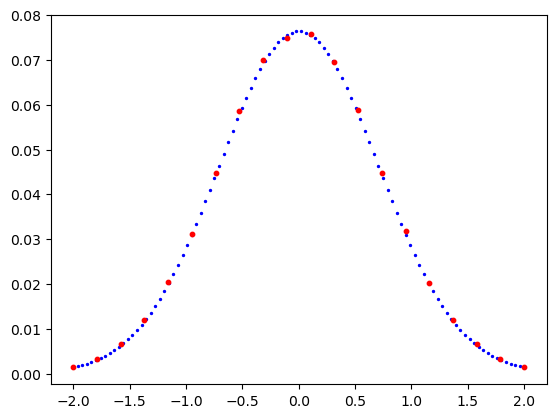

In [7]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()

In [8]:
for result in propagators_pimc_results:
    print(result.Q)

0.47531148453069405
0.5157400662374767
0.3872607986869938
0.6463434651696065
0.5131137686904759
0.8830523818358745
0.004435949675940925
0.6587972559707536
0.3490982545984974
0.2618528620480102
0.9226111417734435
0.26714970693435014
0.6925533337187064
0.5780422041894411
0.20899429716068565
0.11503155062801096
0.6933769396108721
0.6353924192094131
0.09372221959795998
0.05324164946694268


If all Qs are greater than $0.05$, it means that all points are statistically significant. 

# Potential $x^4/2$

In [6]:
def V_x4(x: float):
    return x ** 4 / 2

In [7]:
x4_system = NonRelativisticSingleParticle1D(V=V_x4, T=4, N=8)

In [8]:
propagators_exact = x4_system.compute_propagator_from_ground_state(x_exact)
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc, lower_bound=-4, upper_bound=4, neval=10000)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

Computing...
Took 0.023049116134643555


In [9]:
for result in propagators_pimc_results:
    print(result.Q)

0.9382620021620652
0.5087009435757535
0.5885913863241677
0.20939308287274536
0.8835058905408023
0.9780992138672137
0.19368531171097392
0.2523493742860664
0.06827717867141223
0.9835984743688325
0.7362327328682097
0.8969127712213217
0.7564552994357926
0.6900371155141384
0.2839868883864282
0.7002301816542846
0.9323566502316537
0.06475918647477566
0.6297458726767933
0.2887466147513742


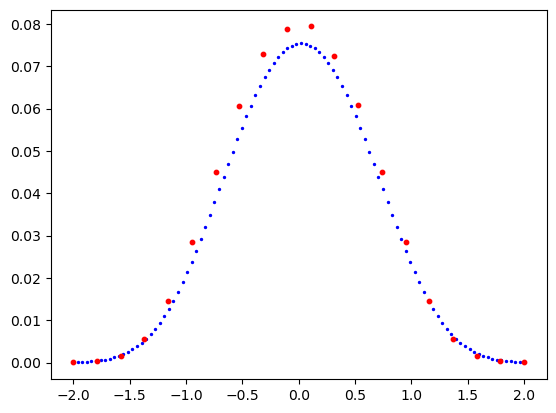

In [10]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()